In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Cursos/Valerio_Velardo/Deep_Learning_for_audio/data.json"

In [ ]:
def load_data(dataset_path):
  with open(dataset_path, 'r') as fp:
    data = json.load(fp)

  # convertir list a numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  return inputs, targets

def split_data(inputs, targets, test_size):
  return train_test_split(inputs, targets, test_size=test_size)

def plot_history(history):
  fig, axs = plt.subplots(2)

  # create accuracy subplot
  axs[0].plot(history.history['accuracy'], label='train accuracy')
  axs[0].plot(history.history['val_accuracy'], label='test accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='lower right')
  axs[0].set_title('Accuracy eval')

  # create error subplot
  axs[1].plot(history.history['loss'], label='train error')
  axs[1].plot(history.history['val_loss'], label='test error')
  axs[1].set_ylabel('Error')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(loc='upper right')
  axs[1].set_title('Error eval')

  plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.1507 - loss: 49.8279 - val_accuracy: 0.2407 - val_loss: 3.5307
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.1729 - loss: 7.9482 - val_accuracy: 0.1722 - val_loss: 3.4344
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.1581 - loss: 4.8347 - val_accuracy: 0.1532 - val_loss: 3.4506
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.1677 - loss: 4.0111 - val_accuracy: 0.1429 - val_loss: 3.4493
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.1481 - loss: 3.7912 - val_accuracy: 0.1365 - val_loss: 3.4505
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.1593 - loss: 3.6466 - val_accuracy: 0.1626 - val_loss: 3.4117
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1700 - loss: 3.5897 - val_accuracy: 0.1629 - val_loss: 3.3986
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1620 - loss: 3.5340 - val_a

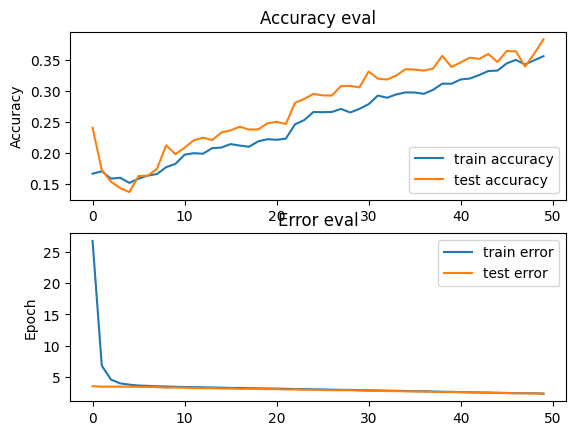

In [ ]:
if __name__ == "__main__":
  # load data
  inputs, targets = load_data(DATA_PATH)
  # split data into train and test set
  inputs_train, inputs_test, targets_train, targets_test = split_data(inputs, targets, 0.3)
  # build the networkt arquitecture
  model = keras.Sequential([
      # input layer
      keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), #(time interval, value coefficient in interval)
      # 1st hidden layer
      keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),
      # 2st hidden layer
      keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),
      # 3st hidden layer
      keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),
      # output layer
      keras.layers.Dense(10, activation='softmax') # 10 categories
  ])
  # compile network
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.summary()

  # train network
  history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

  # plot accuracy and error over the epochs
  plot_history(history)